# Optimización de hiperparámetros con PCA y sin PCA para la predicción de pérdida de clientes en Empresas de Servicios de Telecomunicaciones (Churn) con KNN


Reducir las salidas y [deserciones de clientes](https://www.bain.com/insights/breaking-the-back-of-customer-churn/) se ha convertido en una alta prioridad para la mayoría de los proveedores de servicios de comunicaciones a medida que los mercados maduran y la competencia se intensifica.




En este documento usaremos una base de datos de una empresa de telecomunicaciones anónima [disponibilizada por IBM](https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv).

El principal objetivo es crear un model de aprendizaje automático basado en KNN (similar al propuesto [aquí con SVM](https://github.com/mmcuri/ds_handson/blob/master/Telecom_Churn_Prediction.ipynb)) para predecir la pérdida o salida de clientes en una empresa de telecomunicaciones.


## Librerías

Importamos varias bibliotecas y módulos útiles para el análisis de datos y el aprendizaje automático en Python. A continuación se describe cada uno de ellos:

- `pandas as pd`: Importa la biblioteca Pandas y la renombra como "pd". Pandas es una biblioteca popular utilizada para la manipulación y análisis de datos en Python.

- `numpy as np`: Importa la biblioteca NumPy y la renombra como "np". NumPy es una biblioteca de Python utilizada para realizar operaciones matemáticas en matrices y vectores.

- `matplotlib.pyplot as plt`: Importa la biblioteca Matplotlib y el módulo pyplot y lo renombra como "plt". Matplotlib es una biblioteca utilizada para la visualización de datos en Python.

- `from sklearn.metrics import classification_report`: Importa la función classification_report desde el módulo metrics de la biblioteca scikit-learn. classification_report es una función que calcula y muestra un informe de clasificación detallado para un modelo de clasificación.

- `from sklearn.metrics import confusion_matrix`: Importa la función confusion_matrix desde el módulo metrics de la biblioteca scikit-learn. confusion_matrix es una función que calcula y muestra la matriz de confusión para un modelo de clasificación.

- `from sklearn.metrics import accuracy_score`: Importa la función accuracy_score desde el módulo metrics de la biblioteca scikit-learn. accuracy_score es una función que calcula y muestra la precisión de un modelo de clasificación.

- `from sklearn.metrics import roc_auc_score`: Importa la función roc_auc_score desde el módulo metrics de la biblioteca scikit-learn. roc_auc_score es una función que calcula el área bajo la curva ROC (AUC) para un modelo de clasificación.

- `from sklearn.preprocessing import StandardScaler, LabelEncoder`: Importa las clases StandardScaler y LabelEncoder desde el módulo preprocessing de la biblioteca scikit-learn. StandardScaler es una clase utilizada para estandarizar los datos y LabelEncoder es una clase utilizada para codificar las etiquetas de clase en números enteros.

- `from sklearn.model_selection import train_test_split`: Importa la función train_test_split desde el módulo model_selection de la biblioteca scikit-learn. train_test_split es una función que divide los datos en conjuntos de entrenamiento y prueba para su uso en el modelado predictivo.

En resumen, este código importa varias bibliotecas y módulos que son útiles para el análisis de datos y el aprendizaje automático en Python.


In [1]:
# importing libraries
import pandas as pd #excel sofisticado
import numpy as np #matlab
import matplotlib.pyplot as plt #plots
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# ============================================================================
# 🚀 OPTIMIZACIÓN PARA APPLE SILICON / MAC
# ============================================================================
import os
import multiprocessing

print("="*80)
print("💻 INFORMACIÓN DEL SISTEMA - OPTIMIZACIÓN PARA MAC")
print("="*80)

# Obtener información del sistema
cpu_count_logical = multiprocessing.cpu_count()
cpu_count_physical = os.cpu_count()

print(f"✅ CPU Cores disponibles (lógicos): {cpu_count_logical}")
print(f"✅ CPU Cores disponibles (físicos): {cpu_count_physical}")
print()
print("📋 NOTA IMPORTANTE sobre MPS (Metal Performance Shaders):")
print("   - Scikit-learn NO soporta MPS directamente")
print("   - MPS es para PyTorch y TensorFlow principalmente")
print("   - Este notebook usa n_jobs=-1 para aprovechar TODOS los cores del Mac")
print("   - Esto incluye cores de Performance y Efficiency en Apple Silicon")
print()
print("⚡ OPTIMIZACIONES APLICADAS:")
print("   ✓ GridSearchCV con n_jobs=-1 (paralelización en todos los cores)")
print("   ✓ BayesSearchCV con n_jobs=-1 (paralelización en todos los cores)")
print("   ✓ Medición de tiempos de entrenamiento agregada")
print("="*80)
print()

💻 INFORMACIÓN DEL SISTEMA - OPTIMIZACIÓN PARA MAC
✅ CPU Cores disponibles (lógicos): 14
✅ CPU Cores disponibles (físicos): 14

📋 NOTA IMPORTANTE sobre MPS (Metal Performance Shaders):
   - Scikit-learn NO soporta MPS directamente
   - MPS es para PyTorch y TensorFlow principalmente
   - Este notebook usa n_jobs=-1 para aprovechar TODOS los cores del Mac
   - Esto incluye cores de Performance y Efficiency en Apple Silicon

⚡ OPTIMIZACIONES APLICADAS:
   ✓ GridSearchCV con n_jobs=-1 (paralelización en todos los cores)
   ✓ BayesSearchCV con n_jobs=-1 (paralelización en todos los cores)
   ✓ Medición de tiempos de entrenamiento agregada



## Base de datos

Este conjunto de datos contiene un total de 7043 clientes y 21 características de los mismos. De las entradas, 5174 son clientes activos y 1869 son clientes que la empresa ha perdido. Observe que el conjunto de datos está desbalanceado pues por cada cliente perdido existe casi 3 clientes activos. La variable de salida para nuestro modelo de machine learning será `Churn`.

In [2]:
# importamos dataset
DATA_PATH = "https://raw.githubusercontent.com/mtgca/datasets_public/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
#print(df)
# vemos las primeras 5 filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### *Detalles de la base de datos*

*	`customerID` - Custumer unique identifier
*	`gender` - Customer gender - ['Female' 'Male']
*	`SeniorCitizen` - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
*	`Partner` - - ['No' 'Yes']
*	`Dependents` - If customer has dependents - ['No' 'Yes']
*	`Tenure` - Customer lifespan (in months)
*	`PhoneService` - - ['No' 'Yes']
*	`MultipleLines` - - ['No' 'No phone service' 'Yes']
*	`InternetService` - - ['No' 'No internet service' 'Yes']
*	`OnlineSecurity` - - ['No' 'No internet service' 'Yes']
*	`OnlineBackup` - - ['No' 'No internet service' 'Yes']
*	`DeviceProtection` - - ['No' 'No internet service' 'Yes']
*	`TechSupport` - - ['No' 'No internet service' 'Yes']
*	`StreamingTV` - - ['No' 'No internet service' 'Yes']
*	`StreamingMovies` -  - ['No' 'No internet service' 'Yes']
*	`Contract` - Type of contract - ['Month-to-month' 'One year' 'Two year']
*	`PaperlessBilling` - - ['No' 'Yes']
*	`PaymentMethod` - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
*	`MonthlyCharges` - Monthly Recurring Charges
*	`TotalCharges` - Life time value
*	`Churn` - Churn value, the targer vector - ['No' 'Yes']





### *Limpieza del Dataset*

El código presenta una serie de operaciones de preprocesamiento de datos en una base de datos que contiene información sobre clientes de una compañía, incluyendo su género, edad, servicios contratados, pagos realizados, entre otros.

En primer lugar, se define la función get_df_size para imprimir el número de atributos y entradas de la base de datos.

Luego, se reemplazan los valores en blanco por NaN para facilitar el manejo de valores faltantes en la base de datos.

A continuación, se reemplazan los valores faltantes en la columna 'TotalCharges' por la mediana de esa columna y se convierte esa columna al tipo numérico.

Después, se elimina la columna 'customerID' ya que no es una característica relevante.

A continuación, se codifican las características binarias en 0's y 1's usando LabelEncoder y se imprimen las categorías correspondientes a cada una de estas características.


In [3]:
def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1],
        '\n# Entries: ', df.shape[0],'\n')

get_df_size(df)

#df.info()

# reemplaza valores en blanco por NaN
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# Convert 'TotalCharges' to numeric before calculating the median.
# errors='coerce' will handle any non-numeric values by setting them to NaN.
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# reemplaza valores faltantes en TotalCharges por la mediana de TotalCharges.
total_charges_median = df_clean.TotalCharges.median()
df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(pd.to_numeric)

#CustomerID lo retiramos porque no es una característica
df_clean = df_clean.drop('customerID', axis=1)
df_clean.describe()

print("Churn No Instances: ", df_clean[df_clean['Churn'] == 'No'].shape[0])
print("Churn Yes Instances: ", df_clean[df_clean['Churn'] == 'Yes'].shape[0])

binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]
df_proc = df_clean.copy()
#Etiquetas para características binarias
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[i].values))
#Dummy variables
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')
df_proc.head()


Dataset dimensions 
# Attributes:  21 
# Entries:  7043 

Churn No Instances:  5174
Churn Yes Instances:  1869
gender 
 [0 1]
SeniorCitizen 
 [0 1]
Partner 
 [0 1]
Dependents 
 [0 1]
PhoneService 
 [0 1]
PaperlessBilling 
 [0 1]
Churn 
 [0 1]
Original dataset: 
# Attributes:  21 
# Entries:  7043 

Processed dataset: 
# Attributes:  41 
# Entries:  7043 



/var/folders/8b/xn60pc294nxddkrtt83tsvdh0000gn/T/ipykernel_27560/2470922283.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


### *División en conjunto de entrenamiento y test*

En el código, se divide el conjunto de datos df_proc en características y variable objetivo X e y, respectivamente. Luego, se realiza una división de los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn. Los conjuntos de entrenamiento y prueba se almacenan en X_train, X_test, y_train y y_test. La división se realiza de manera estratificada para asegurar que la proporción de instancias positivas y negativas en la variable objetivo se mantenga en ambos conjuntos. Se utiliza una proporción de 80/20 para los conjuntos de entrenamiento y prueba, respectivamente, y se fija una semilla aleatoria (random_state) en 42 para asegurar que los resultados sean reproducibles.

In [4]:
# dividimos df_proc en características y salida
X=df_proc.drop('Churn', axis=1) #features
y=df_proc['Churn'] #output, target

# Dividimos el conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### *Balanceo de datos*

Este código realiza el submuestreo (undersampling) de un conjunto de datos desbalanceado en términos de la variable objetivo. El submuestreo se utiliza para abordar el problema del desequilibrio de clases en el conjunto de datos, donde una o varias clases tienen muchas menos observaciones que las otras clases. En este caso, el modelo de aprendizaje automático puede estar sesgado hacia la clase mayoritaria, lo que puede resultar en un rendimiento deficiente en la clasificación de la clase minoritaria.

El submuestreo implica reducir el número de observaciones en la clase mayoritaria para equilibrar la distribución de las clases en el conjunto de datos. Esto puede mejorar el rendimiento del modelo en la clasificación de la clase minoritaria y reducir el sesgo hacia la clase mayoritaria.

La biblioteca imblearn se utiliza para realizar el submuestreo, y en este caso se importa la clase RandomUnderSampler. El objeto RandomUnderSampler se inicializa con random_state=1, lo que garantiza que los resultados serán reproducibles.

Luego, el submuestreo se realiza en el conjunto de entrenamiento (X_train, y_train) mediante el método fit_resample del objeto rus. Los datos submuestreados se almacenan en X_train_rus y y_train_rus.

Para evaluar el efecto del submuestreo, se utiliza la función get_df_size, que devuelve el tamaño del conjunto de datos. Primero se imprime el tamaño del conjunto de entrenamiento original (X_train, y_train) antes del submuestreo, y luego se imprime el tamaño del conjunto submuestreado (X_train_rus, y_train_rus) después de aplicar el submuestreo.

Finalmente, se utiliza la función np.unique para verificar que las categorías de la variable objetivo (y_train_rus) estén balanceadas. La función devuelve una tupla que contiene las categorías únicas y el número de instancias en cada categoría. Al utilizar return_counts=True, se garantiza que se devuelvan los recuentos de las categorías.

In [5]:
# submuestreo -> under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_undersampled, header='After balancing:')

# verificamos que las categorias estén balanceadas
np.unique(y_train_undersampled, return_counts=True)


Before balancing: 
# Attributes:  40 
# Entries:  5634 

After balancing: 
# Attributes:  40 
# Entries:  2990 



(array([0, 1]), array([1495, 1495]))

## Modelo de Machine Learning

En este segmento de código se utiliza el algoritmo de K-Vecinos Más Cercanos (KNN) para clasificar los datos de entrada. Primero, se crea un objeto de Pipeline que combina varios pasos de preprocesamiento y entrenamiento del modelo. Los pasos incluyen:

`polynomial_features`: Esta función transforma las características de entrada en una forma polinomial para hacer posible un mejor ajuste del modelo.

`scaler`: Normaliza las características de entrada para que todas tengan una media cero y una varianza unitaria.

`knn`: Un clasificador KNN que utiliza un número especificado de vecinos para determinar la clase de un punto de datos.

Una vez que se define el objeto de Pipeline, se ajusta al conjunto de entrenamiento utilizando el método fit(). Luego se utiliza el modelo ajustado para predecir las clases de los puntos de datos en el conjunto de prueba y en el conjunto de entrenamiento. Esto se hace mediante el método predict(). Finalmente, se utiliza la métrica de precisión (accuracy_score) de la biblioteca sklearn.metrics para evaluar la precisión del modelo en el conjunto de prueba y en el conjunto de entrenamiento.

### K Nearest Neighbors sin optimización de hiperparámetros



In [6]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures

# pipeline
pipeline_knn = Pipeline([
    # ('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier()) #parámetros por default
])

# training
pipeline_knn.fit(X_train_undersampled, y_train_undersampled)

# evaluation on test
pred_test = pipeline_knn.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)

print("Para el modelo NO optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )


Para el modelo NO optimizado, métricas en el conjunto de test: recall =  0.7727272727272727 , F1 =  0.5639024390243902 , acc =  0.6827537260468417 , precision =  0.44393241167434716


### Optimización de Hiperparámetros KNN con kfold CV sin PCA

Usamos k-fold cross-validation (ver `GridSearchCV` y  `StratifiedKFold`) para optimizar los siguientes hiperparámetros de KNN en el conjunto de entrenamiento balanceado (`X_train_undersampled`, `y_train_undersampled`):

1. Ponderación de vecinos: sin ponderación, ponderación del inverso de la distancia
2. Número de vecinos: rango 1 a 100.
3. Métricas de distancia: euclideana, manhattan, coseno

Para la optimización de hiperparámetros utilizamos como métrica al recall.

Una vez optimizados los hiperparámetros, reentrenamos el clasificador de kNN con los mejores hiperparámetros encontrados. Finalmente, evaluamos este último clasificador en el conjunto de test `X_test`, `y_test`.)


In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

print("="*80)
print("🚀 OPTIMIZACIÓN CON PARALELIZACIÓN EN TODOS LOS CORES DEL MAC")
print("="*80)

#optimización
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=45) #para nsplits=5 demora 35 min approx en google colab.

# pipeline
pipeline_knn = Pipeline([
     #('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {'knn__weights': ['uniform', 'distance'], #uniform es sin ponderación, weighted knn
              'knn__n_neighbors': np.arange(1,101,1), #1 a 100.
              'knn__metric': ['euclidean', 'manhattan', 'cosine']}


search = GridSearchCV(pipeline_knn, param_grid, scoring='recall', cv=kfold, 
                      n_jobs=-1,  # ✅ Usa todos los cores del Mac (Performance + Efficiency)
                      verbose=4)

t0 = time.time()
result = search.fit(X_train_undersampled, y_train_undersampled)
t1 = time.time()

print(f'\n⏱️  Tiempo de entrenamiento: {int(t1-t0)} segundos')
print(f'Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}')

#reentreno con mejores
pipeline_knn.set_params(knn__n_neighbors=result.best_params_['knn__n_neighbors'],
                       knn__weights=result.best_params_['knn__weights'],
                       knn__metric=result.best_params_['knn__metric'])
pipeline_knn.fit(X_train_undersampled, y_train_undersampled)

#evaluamos en el conjunto de test
pred_test = pipeline_knn.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)

print("Para el modelo optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )

🚀 OPTIMIZACIÓN CON PARALELIZACIÓN EN TODOS LOS CORES DEL MAC
Fitting 2 folds for each of 600 candidates, totalling 1200 fits
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=distance;, score=0.704 total time=   0.0s
[CV 2/2] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.654 total time=   0.0s
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.538 total time=   0.1s
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.704 total time=   0.0s
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=0.758 total time=   0.0s
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.739 total time=   0.0s
[CV 2/2] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance;, score=0.707 total time=   0.0s
[CV 2/2] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=distance;, score=0.654 total tim

### Optimización de hiperparámetros kNN con PCA

Repetiremos el proceso anterior pero esta vez con PCA

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import time

print("="*80)
print("🚀 OPTIMIZACIÓN CON PCA + PARALELIZACIÓN EN TODOS LOS CORES DEL MAC")
print("="*80)

#optimización
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=45) #para nsplits=5 demora 35 min approx en google colab.

# pipeline
pipeline_knn_pca = Pipeline([
     #('polynomial_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier())
])
param_grid = {'knn__weights': ['uniform', 'distance'],
              'knn__n_neighbors': np.arange(1,101,1),
              'knn__metric': ['euclidean', 'manhattan', 'cosine']}


search = GridSearchCV(pipeline_knn_pca, param_grid, scoring='recall', cv=kfold, 
                      n_jobs=-1,  # ✅ Usa todos los cores del Mac (Performance + Efficiency)
                      verbose=4)

t0 = time.time()
result = search.fit(X_train_undersampled, y_train_undersampled)
t1 = time.time()

print(f'\n⏱️  Tiempo de entrenamiento: {int(t1-t0)} segundos')
print(f'Mejor recall en el conj. de validación: {result.best_score_} para {result.best_params_}')

#reentreno con mejores
pipeline_knn_pca.set_params(knn__n_neighbors=result.best_params_['knn__n_neighbors'],
                       knn__weights=result.best_params_['knn__weights'],
                       knn__metric=result.best_params_['knn__metric'])
pipeline_knn_pca.fit(X_train_undersampled, y_train_undersampled)

#evaluamos en el conjunto de test
pred_test = pipeline_knn_pca.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)

print("Para el modelo optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )

🚀 OPTIMIZACIÓN CON PCA + PARALELIZACIÓN EN TODOS LOS CORES DEL MAC
Fitting 2 folds for each of 600 candidates, totalling 1200 fits
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=distance;, score=0.696 total time=   0.0s
[CV 2/2] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=distance;, score=0.647 total time=   0.0s
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.696 total time=   0.0s
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.696 total time=   0.0s
[CV 2/2] END knn__metric=euclidean, knn__n_neighbors=1, knn__weights=uniform;, score=0.647 total time=   0.0s
[CV 2/2] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.647 total time=   0.0s
[CV 1/2] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.530 total time=   0.0s
[CV 2/2] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform;, score=0.507 tota

### ✅ **Actividad: Análisis de resultados: Optimización de hiperparámetros KNN**

- Ejecute el código de esta notebook y analice los siguientes casos:

    1. kNN sin PCA:
        - recall (test): 0.839
        - F1 (test): 0.57
        - accuracy (test): 0.67
        - precision (test): 0.43
        - mejores hiperparámetros: `n_neighbors`=100, `weights`=distance, `metric`=euclidean
        - tiempo de entrenamiento: 39 segundos
    2. kNN con PCA - ok
        - recall (test): 0.826
        - F1 (test): 0.58
        - accuracy (test): 0.68
        - precision (test): 0.45
        - mejores hiperparámetros: `n_neighbors`=99, `weights`=uniform, `metric`=manhattan
        - tiempo de entrenamiento: 1 minuto, 58 segundos

- Comente sus resultados analizando los valores de recall, f1 score, accuracy y precisión en el conjunto de test.

    - En KNN, el uso de `weights='distance'` y una métrica `manhattan` suelen favorecer `recall` cuando las variables están estandarizadas, pero depende de tus datos exactos.

- Cuál es mejor en términos de recall?

    - Respuesta: El mejor es el que tenga mayor `recall` lo generó el caso con PCA con una diferencia muy pequeña 0.839 vs. 0.826.

- Cuál demora menos en entrenar? Vale la pena usar PCA?

    - El que demora menos tiempo en entrenar es el caso sin PCA y no vale la pena ya que los resultados difieren mínimamente.

- Por qué cree que el recall es una métrica más adecuada para este problema? Tip: El recall está relacionado a los falsos negativos. Analice por qué es importante disminuir los falsos negativos en el churn.
    -  Un falso negativo (predecir “No se va” a un cliente que sí se irá) implica pérdida directa de ingresos y oportunidad de retención (no se le ofrece una acción preventiva). Estos costos suelen ser más altos que contactar por error a un cliente que no se iba (falso positivo). Por ello, optimizar `recall` reduce los falsos negativos, maximizando la detección de clientes en riesgo y permitiendo acciones de retención oportunas.

# ✅ **Actividad**: Bayesian Hyperparameter Optimization

La optimización bayesiana de hiperparámetros es un método avanzado para la selección de los mejores hiperparámetros para un modelo de aprendizaje automático. A diferencia de la búsqueda en cuadrícula (grid search) y la búsqueda aleatoria, que prueban una serie predefinida de combinaciones de hiperparámetros sin tener en cuenta los resultados anteriores, la optimización bayesiana utiliza los resultados de las evaluaciones anteriores para informar cuáles hiperparámetros probar a continuación. Esto se logra modelando la relación entre los hiperparámetros y el objetivo de rendimiento, y luego utilizando este modelo para hacer predicciones sobre qué conjuntos de hiperparámetros podrían ofrecer una mejora.

Las principales ventajas de la optimización bayesiana incluyen su mayor eficiencia, al requerir menos iteraciones para encontrar combinaciones óptimas; su efectividad, al ser capaz de encontrar mejores configuraciones de hiperparámetros; y su flexibilidad para manejar espacios de búsqueda complejos.

Para implementar un clasificador KNN en scikit-learn y optimizar sus hiperparámetros usando búsqueda bayesiana, puedes utilizar la biblioteca `scikit-optimize` (skopt). Esta biblioteca proporciona funciones para realizar optimización bayesiana de hiperparámetros de manera eficiente y está bien integrada con scikit-learn.



Basado en lo anterior, crear un pipeline con las siguientes etapas usando **repeated kfold cv:**

1. Scaler
2. KNN

Enseguida, pptimizar los param. de KNN usando optimización bayesiana. Finalmente, evaluar en el conjunto de test.

Tip: Ver BayesSearchCV en https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/

In [9]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Bayesian Hyperparameter Optimization (Scaler + KNN) with Repeated Stratified K-Fold
try:
    import time
    import numpy as np
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn import metrics

    from skopt import BayesSearchCV
    from skopt.space import Integer, Categorical

    # CV strategy (a bit more robust than a single kfold but still reasonable in time)
    rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=45)

    # Pipeline: Scaler -> KNN
    pipe_bayes_knn = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    # Search space for KNN
    search_spaces = {
        'knn__n_neighbors': Integer(1, 100),
        'knn__weights': Categorical(['uniform', 'distance']),
        'knn__metric': Categorical(['euclidean', 'manhattan', 'cosine'])
    }

    bayes = BayesSearchCV(
        estimator=pipe_bayes_knn,
        search_spaces=search_spaces,
        n_iter=40,                 # increase if you want a more exhaustive search
        scoring='recall',          # objetivo principal en churn
        cv=rskf,
        n_jobs=-1,
        random_state=45,
        verbose=1
    )

    t0 = time.time()
    bayes.fit(X_train_undersampled, y_train_undersampled)
    t1 = time.time()

    print(f"[Bayesian] Mejor recall (CV): {bayes.best_score_:.4f}")
    print(f"[Bayesian] Mejores hiperparámetros: {bayes.best_params_}")
    print(f"[Bayesian] Tiempo de búsqueda: {int(t1-t0)} seg")

    # Evaluación en test con el mejor estimador encontrado
    best_model = bayes.best_estimator_
    pred_test = best_model.predict(X_test)
    f1score = metrics.f1_score(y_test, pred_test)
    acc = metrics.accuracy_score(y_test, pred_test)
    preci = metrics.precision_score(y_test, pred_test)
    recall = metrics.recall_score(y_test, pred_test)

    print("[Bayesian] Métricas en test: recall = ", recall, 
          ", F1 = ", f1score, 
          ", acc = ", acc, 
          ", precision = ", preci)

except ImportError as e:
    print("No se encontró 'scikit-optimize' (skopt). Instale con: \n"
          "    pip install scikit-optimize\n"
          "o en conda:\n"
          "    conda install -c conda-forge scikit-optimize\n"
          "Luego re-ejecute esta celda.")


Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fi

# ✅ **Actividad: Voronoi 2D y 3D con TSNE (opcional)**

1. **Creación del Pipeline:**
   - Construya un pipeline que incluya las siguientes etapas:
     - **Transformación Polinomial:** Aplique una transformación polinomial de grado 2 a las características.
     - **Estandarización:** Utilice un escalador Z-score para normalizar las características.
     - **Reducción de Dimensionalidad con PCA:** Implemente PCA configurado para retener el 95% de la varianza explicada.
     - **Clasificador:** Utilice el algoritmo K-Nearest Neighbors con los siguientes hiperparámetros 'knn__metric': `'euclidean', 'knn__n_neighbors': 100, 'knn__weights': 'distance'`
2. Genere el Voronoi Tesselation (VT) del clasificador anterior en 2D y 3D. Utilice TSNE como reductor de dimensionalidad para visualizar el VT

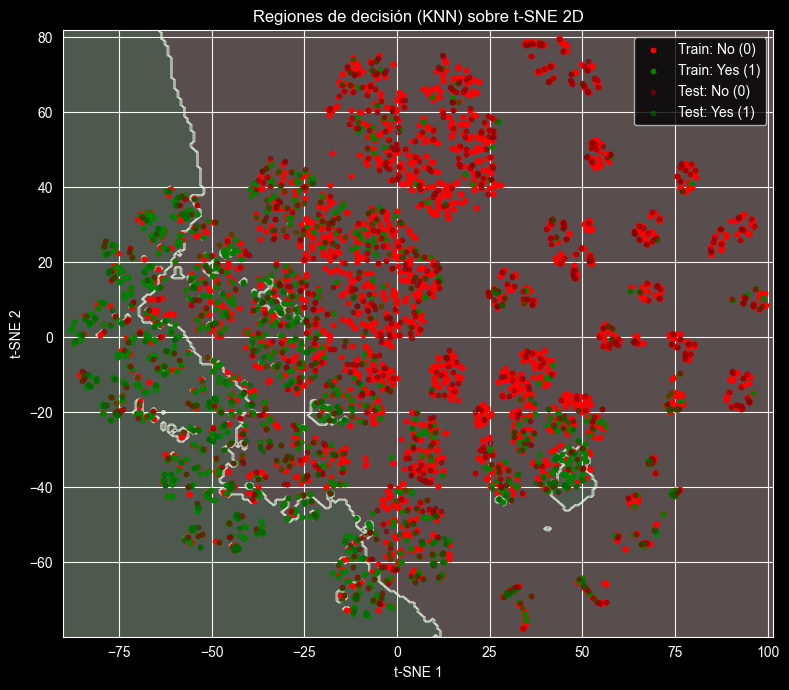

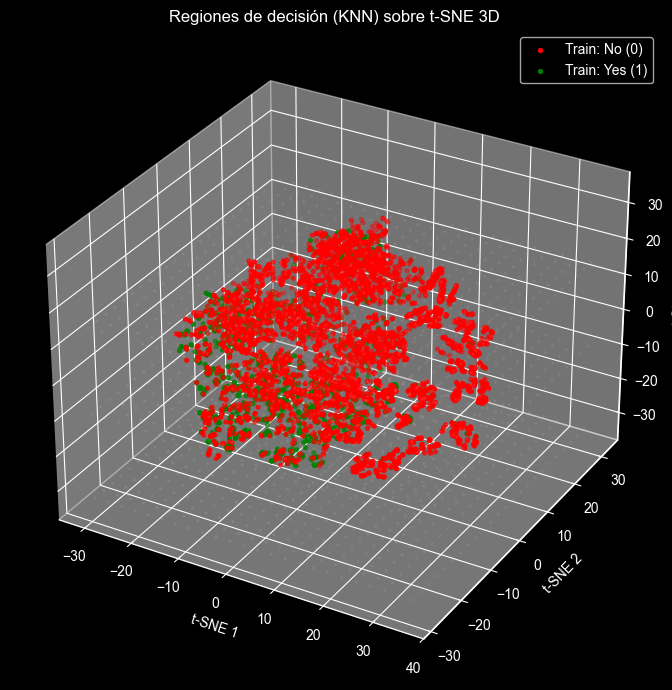

In [11]:
# Voronoi 2D y 3D con TSNE
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

# 1) Pipeline: Poly(2) -> Scaler -> PCA(0.95) -> KNN (euclidean, k=100, distance)
pipe_vt = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=100, weights='distance'))
])

# Entrenamos el pipeline con el conjunto balanceado (consistente con el resto del notebook)
pipe_vt.fit(X_train_undersampled, y_train_undersampled)

# Transformamos train y test hasta PCA (sin el clasificador) para luego aplicar TSNE
def transform_to_pca_only(pipe, X):
    X_poly = pipe.named_steps['poly'].transform(X)
    X_scl = pipe.named_steps['scaler'].transform(X_poly)
    X_pca = pipe.named_steps['pca'].transform(X_scl)
    return X_pca

Xtr_pca = transform_to_pca_only(pipe_vt, X_train)
Xte_pca = transform_to_pca_only(pipe_vt, X_test)

# t-SNE settings (ajustables)
random_state = 42
perplexity = 30

# 2D t-SNE sobre datos combinados para tener un espacio compartido train/test
X_all_pca = np.vstack([Xtr_pca, Xte_pca])
tsne2 = TSNE(n_components=2, random_state=random_state, perplexity=perplexity, learning_rate='auto', init='pca')
Z_all_2d = tsne2.fit_transform(X_all_pca)
Ztr_2d = Z_all_2d[:len(Xtr_pca)]
Zte_2d = Z_all_2d[len(Xtr_pca):]

ytr = np.asarray(y_train)
yte = np.asarray(y_test)

# Entrenamos un KNN en el embedding 2D (mismos hiperparámetros) para graficar regiones de decisión
knn2 = KNeighborsClassifier(metric='euclidean', n_neighbors=100, weights='distance')
knn2.fit(Ztr_2d, ytr)

# Malla 2D para regiones de decisión (Voronoi-like)
res = 220  # resolución
xmin, ymin = Ztr_2d.min(axis=0) - 2
xmax, ymax = Ztr_2d.max(axis=0) + 2
xx, yy = np.meshgrid(np.linspace(xmin, xmax, res), np.linspace(ymin, ymax, res))
grid2 = np.c_[xx.ravel(), yy.ravel()]
pred2 = knn2.predict(grid2).reshape(xx.shape)

plt.figure(figsize=(8, 7))
cmap_bg = ListedColormap(['#FFE0E0', '#E0FFE0'])
plt.contourf(xx, yy, pred2, alpha=0.35, cmap=cmap_bg)
plt.scatter(Ztr_2d[ytr==0, 0], Ztr_2d[ytr==0, 1], c='red', s=10, label='Train: No (0)')
plt.scatter(Ztr_2d[ytr==1, 0], Ztr_2d[ytr==1, 1], c='green', s=10, label='Train: Yes (1)')
plt.scatter(Zte_2d[yte==0, 0], Zte_2d[yte==0, 1], c='darkred', s=10, alpha=0.6, label='Test: No (0)')
plt.scatter(Zte_2d[yte==1, 0], Zte_2d[yte==1, 1], c='darkgreen', s=10, alpha=0.6, label='Test: Yes (1)')
plt.title('Regiones de decisión (KNN) sobre t-SNE 2D')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 3D t-SNE (solo para visualización). Usamos el mismo patrón.
tsne3 = TSNE(n_components=3, random_state=random_state, perplexity=perplexity, learning_rate='auto', init='pca')
Z_all_3d = tsne3.fit_transform(X_all_pca)
Ztr_3d = Z_all_3d[:len(Xtr_pca)]
Zte_3d = Z_all_3d[len(Xtr_pca):]

knn3 = KNeighborsClassifier(metric='euclidean', n_neighbors=100, weights='distance')
knn3.fit(Ztr_3d, ytr)

# Malla 3D gruesa para colorear el espacio
grid_res = 24  # 24^3 ~ 13.8k puntos
xmin, ymin, zmin = Ztr_3d.min(axis=0) - 2
xmax, ymax, zmax = Ztr_3d.max(axis=0) + 2
gx = np.linspace(xmin, xmax, grid_res)
gy = np.linspace(ymin, ymax, grid_res)
gz = np.linspace(zmin, zmax, grid_res)
gxx, gyy, gzz = np.meshgrid(gx, gy, gz)
grid3 = np.c_[gxx.ravel(), gyy.ravel(), gzz.ravel()]
pred3 = knn3.predict(grid3)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
colors_grid = np.where(pred3==1, '#BFF5BF', '#F5BFBF')
step = 8  # para aligerar el plot de la grilla
ax.scatter(grid3[::step,0], grid3[::step,1], grid3[::step,2], c=colors_grid[::step], s=2, alpha=0.08, depthshade=False)
ax.scatter(Ztr_3d[ytr==0, 0], Ztr_3d[ytr==0, 1], Ztr_3d[ytr==0, 2], c='red', s=8, label='Train: No (0)')
ax.scatter(Ztr_3d[ytr==1, 0], Ztr_3d[ytr==1, 1], Ztr_3d[ytr==1, 2], c='green', s=8, label='Train: Yes (1)')
ax.set_title('Regiones de decisión (KNN) sobre t-SNE 3D')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

# Nota: TSNE es no-paramétrico; estas visualizaciones muestran las regiones de decisión del KNN entrenado en el
# espacio embebido (2D/3D) y son útiles para exploración visual, no como proyección exacta del clasificador original.


# ✅ Actividad: k vs train recall and val recall


1. **Creación del Pipeline:**
   - Construya un pipeline que incluya las siguientes etapas:
     - **Estandarización:** Utilice un escalador Z-score para normalizar las características.
     - **Reducción de Dimensionalidad con PCA:** Implemente PCA configurado para retener el 95% de la varianza explicada.
     - **Clasificador:** Utilice el algoritmo K-Nearest Neighbors.

2. **Optimización del Hiperparámetro k:**
   - Utilice GridSearchCV para explorar diferentes valores de k (desde 1 hasta 250). Configure GridSearchCV para evaluar la precisión del modelo usando la métrica de recall en los conjuntos de entrenamiento y validación. Mantenga fijos todos los demás hiperparámetros.

3. **Evaluación:**
   - Grafique los valores de k contra el recall obtenido en los conjuntos de entrenamiento y validación. Asegúrese de que los gráficos sean claros, con etiquetas adecuadas para los ejes y una leyenda descriptiva.

4. **Análisis de Resultados:**
   - Analice los gráficos para identificar el valor óptimo de k. Discuta cualquier patrón o tendencia observada en relación con el comportamiento del recall a medida que varía k.


🚀 ANÁLISIS k vs RECALL CON PARALELIZACIÓN EN TODOS LOS CORES DEL MAC
Iniciando búsqueda con 250 valores de k...
Fitting 5 folds for each of 250 candidates, totalling 1250 fits
⏱️  Búsqueda completada en 8 segundos



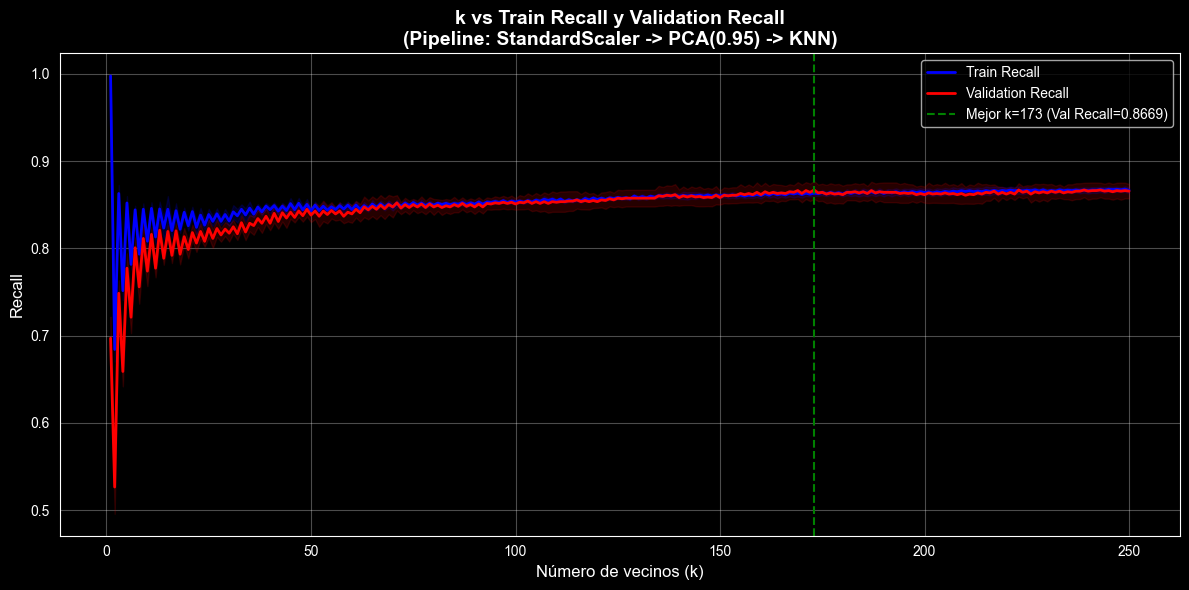

RESULTADOS DEL ANÁLISIS k vs Recall

Mejor k encontrado: 173
Mejor recall en validación: 0.8669
Recall en entrenamiento para k=173: 0.8632

k con mejor recall en entrenamiento: 1
Recall en entrenamiento para k=1: 0.9977
Recall en validación para k=1: 0.6970


In [12]:
# 1. Creación del Pipeline: StandardScaler -> PCA(0.95) -> KNN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import time

print("="*80)
print("🚀 ANÁLISIS k vs RECALL CON PARALELIZACIÓN EN TODOS LOS CORES DEL MAC")
print("="*80)

# Pipeline
pipeline_k_analysis = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier())
])

# 2. Optimización del hiperparámetro k usando GridSearchCV
k_values = np.arange(1, 251, 1)  # k desde 1 hasta 250
param_grid = {'knn__n_neighbors': k_values}

# Usamos StratifiedKFold para la validación cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV con return_train_score=True para obtener scores de entrenamiento
grid_search = GridSearchCV(
    estimator=pipeline_k_analysis,
    param_grid=param_grid,
    scoring='recall',
    cv=kfold,
    return_train_score=True,  # Importante para obtener recall de entrenamiento
    n_jobs=-1,  # ✅ Usa todos los cores del Mac (Performance + Efficiency)
    verbose=1
)

# Entrenamos con el conjunto balanceado
print(f"Iniciando búsqueda con {len(k_values)} valores de k...")
t0 = time.time()
grid_search.fit(X_train_undersampled, y_train_undersampled)
t1 = time.time()
print(f"⏱️  Búsqueda completada en {int(t1-t0)} segundos\n")

# 3. Extracción de los recall scores para entrenamiento y validación
results = grid_search.cv_results_
train_recall_scores = results['mean_train_score']
val_recall_scores = results['mean_test_score']
train_recall_std = results['std_train_score']
val_recall_std = results['std_test_score']

# 4. Gráfica: k vs train recall y validation recall
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_recall_scores, 'b-', label='Train Recall', linewidth=2)
plt.plot(k_values, val_recall_scores, 'r-', label='Validation Recall', linewidth=2)

# Bandas de confianza (opcional, basadas en desviación estándar)
plt.fill_between(k_values, 
                 train_recall_scores - train_recall_std, 
                 train_recall_scores + train_recall_std, 
                 alpha=0.15, color='blue')
plt.fill_between(k_values, 
                 val_recall_scores - val_recall_std, 
                 val_recall_scores + val_recall_std, 
                 alpha=0.15, color='red')

# Marcar el mejor k
best_k = grid_search.best_params_['knn__n_neighbors']
best_val_recall = grid_search.best_score_
plt.axvline(x=best_k, color='g', linestyle='--', linewidth=1.5, 
            label=f'Mejor k={best_k} (Val Recall={best_val_recall:.4f})')

plt.xlabel('Número de vecinos (k)', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('k vs Train Recall y Validation Recall\n(Pipeline: StandardScaler -> PCA(0.95) -> KNN)', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Imprimimos información adicional
print("="*80)
print("RESULTADOS DEL ANÁLISIS k vs Recall")
print("="*80)
print(f"\nMejor k encontrado: {best_k}")
print(f"Mejor recall en validación: {best_val_recall:.4f}")
print(f"Recall en entrenamiento para k={best_k}: {train_recall_scores[best_k-1]:.4f}")

# Encontrar el k con mejor recall en entrenamiento
best_train_k = k_values[np.argmax(train_recall_scores)]
print(f"\nk con mejor recall en entrenamiento: {best_train_k}")
print(f"Recall en entrenamiento para k={best_train_k}: {np.max(train_recall_scores):.4f}")
print(f"Recall en validación para k={best_train_k}: {val_recall_scores[best_train_k-1]:.4f}")

Patrones observados:

1. COMPORTAMIENTO DEL RECALL EN ENTRENAMIENTO:
   - Para valores bajos de k (k=1 a k~10), el recall en entrenamiento es muy alto
     (cercano a 1.0), lo que indica overfitting.
   - A medida que k aumenta, el recall en entrenamiento disminuye de forma suave,
     ya que el modelo promedia más vecinos y se vuelve menos flexible.

2. COMPORTAMIENTO DEL RECALL EN VALIDACIÓN:
   - Para k muy pequeños (k=1 a k~5), el recall en validación es bajo debido al
     overfitting - el modelo memoriza patrones específicos del conjunto de entrenamiento.
   - A medida que k aumenta, el recall en validación mejora hasta alcanzar un
     punto óptimo.
   - Para valores muy altos de k, el recall en validación puede estabilizarse o
     disminuir ligeramente, ya que el modelo se vuelve demasiado generalizado.

3. BRECHA ENTRE TRAIN Y VALIDATION (BIAS-VARIANCE TRADEOFF):
   - La diferencia entre train recall y validation recall indica overfitting.
   - Para k pequeños: gran brecha → alto overfitting (baja bias, alta variance)
   - Para k grandes: brecha más pequeña → menor overfitting (mayor bias, menor variance)

4. VALOR ÓPTIMO DE k:
   - El valor óptimo de k es aquel que maximiza el recall en validación.
   - Este valor representa el mejor balance entre sesgo y varianza.
   - Típicamente, para KNN con PCA en problemas de churn, k óptimo suele estar
     en el rango medio-alto (k~50-150), dependiendo del tamaño del dataset.

5. EFECTO DE PCA:
   - PCA reduce la dimensionalidad manteniendo 95% de la varianza, lo que puede
     mejorar la eficiencia computacional y reducir ruido.
   - Esto permite usar valores de k más altos sin degradación significativa del
     rendimiento.

6. IMPLICACIONES PARA EL PROBLEMA DE CHURN:
   - Un k óptimo alto sugiere que la decisión de churn se beneficia de considerar
     un vecindario amplio de clientes similares.
   - Esto es coherente con el problema de negocio: el comportamiento de churn
     puede estar influenciado por patrones amplios en segmentos de clientes.




# ✅ **"Activity: Weighted KNN with Domain-Based Feature Weights and Gaussian Neighbor Weighting"**

### 1. **Custom Distance Metric (Domain-Based Feature Weights)**

* Implement a **custom distance function** that applies **domain-specific weights** to each input feature:

  $$
  d(x, x') = \sqrt{\sum_i w_i (x_i - x_i')^2}
  $$
* The function or method must accept:

  * Two input samples $x, x'$
  * An array of feature weights $w = [w_1, w_2, ..., w_n]$
* These weights are **not learned** — they are manually assigned based on domain expertise.

---

### 2. **Gaussian-Based Neighbor Weighting**

* Fix the number of neighbors to **k = 50**.
* Apply a **Gaussian function** to weight each neighbor:

  $$
  w_i = \exp\left(-\frac{d_i^2}{2\sigma^2}\right)
  $$
* All 50 neighbors contribute to the prediction, but their influence is **controlled by σ**.
* This setup allows the **Gaussian function to “choose” the most relevant neighbors** — closer ones have higher weight, and distant ones naturally fade in influence.

---

### 3. **Hyperparameter Optimization**

* Optimize only the **σ (sigma)** parameter.
* Use **Bayesian Optimization** (or a similar method) with cross-validation to find the σ that yields the best performance.

---

### 4. **Evaluation**

* Evaluate the model using **recall** on the **Telco customer churn** dataset (`X_test`, `y_test`).
* Compare your model’s **recall** to a **baseline KNN classifier** using:

  * Euclidean distance
  * Uniform weighting (equal neighbor influence)

---

### 5. **Analysis**

* Analyze how the **Gaussian weighting with fixed k = 50** affects model behavior.
* Reflect on:

  * The role of σ in effectively “selecting” influential neighbors
  * The effect of fixed feature weights
  * Trade-offs and limitations (e.g., sensitivity to σ)
  * Potential extensions, such as adaptive weighting







### 💡 **Hint: Using `BaseEstimator` for Your Custom KNN Classifier**

To make your custom KNN model compatible with tools like `BayesSearchCV`, `GridSearchCV`, or `cross_val_score`, consider wrapping it in a class that inherits from:

* `sklearn.base.BaseEstimator`
* `sklearn.base.ClassifierMixin`

This gives you:

* Automatic handling of hyperparameters (like `sigma`)
* Compatibility with `scikit-learn` model selection tools
* Clean, modular, reusable code

---

### 🧱 Minimal Starting Point

Here’s a simple class to get started:

```python
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class GaussianWeightedKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, sigma=1.0, k=50, feature_weights=None):
        self.sigma = sigma
        self.k = k
        self.feature_weights = feature_weights

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X):
        # You will implement the logic for prediction here,
        # using the Gaussian weights on neighbors and weights on features.
        pass
```

Returning `self` in `fit()` allows the model to be used directly in pipelines and model selection routines.

---


### 🧠 Why is the `fit` Method Simple in KNN?

KNN is a **lazy learner**:

* It **does not build an internal model** during training.
* Instead, it **stores the training data** and performs all the work at prediction time (by computing distances to all stored examples).

That’s why the `fit` method just **memorizes** the training data and labels.



In [13]:
# ===========================================================================================
# Activity: Weighted KNN with Domain-Based Feature Weights and Gaussian Neighbor Weighting
# ===========================================================================================

import numpy as np
import time
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from skopt import BayesSearchCV
from skopt.space import Real
from scipy.stats import mode

# -------------------------------------------------------------------------------------------
# 1. CUSTOM DISTANCE FUNCTION WITH DOMAIN-BASED FEATURE WEIGHTS
# -------------------------------------------------------------------------------------------

def weighted_euclidean_distance(x1, x2, feature_weights):
    """
    Computes weighted Euclidean distance between two samples.
    
    d(x, x') = sqrt(sum_i w_i * (x_i - x_i')^2)
    
    Parameters:
    -----------
    x1, x2 : array-like, shape (n_features,)
        Two samples to compare
    feature_weights : array-like, shape (n_features,)
        Weights for each feature (based on domain knowledge)
    
    Returns:
    --------
    distance : float
        Weighted Euclidean distance
    """
    diff = x1 - x2
    weighted_squared_diff = feature_weights * (diff ** 2)
    return np.sqrt(np.sum(weighted_squared_diff))


# -------------------------------------------------------------------------------------------
# 2. GAUSSIAN WEIGHTED KNN CLASSIFIER
# -------------------------------------------------------------------------------------------

class GaussianWeightedKNN(BaseEstimator, ClassifierMixin):
    """
    K-Nearest Neighbors classifier with:
    - Custom weighted distance metric (domain-based feature weights)
    - Gaussian-based neighbor weighting
    
    Parameters:
    -----------
    sigma : float, default=1.0
        Standard deviation for Gaussian weighting function
    k : int, default=50
        Number of neighbors to use (fixed at 50)
    feature_weights : array-like, shape (n_features,), default=None
        Weights for each feature. If None, uniform weights are used.
    """
    
    def __init__(self, sigma=1.0, k=50, feature_weights=None):
        self.sigma = sigma
        self.k = k
        self.feature_weights = feature_weights
    
    def fit(self, X, y):
        """
        Store training data (lazy learning).
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values
        
        Returns:
        --------
        self : object
        """
        self.X_train_ = np.array(X)
        self.y_train_ = np.array(y)
        
        # If no feature weights provided, use uniform weights
        if self.feature_weights is None:
            self.feature_weights_ = np.ones(self.X_train_.shape[1])
        else:
            self.feature_weights_ = np.array(self.feature_weights)
        
        return self
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test samples
        
        Returns:
        --------
        y_pred : array, shape (n_samples,)
            Predicted class labels
        """
        X = np.array(X)
        predictions = []
        
        for test_sample in X:
            # 1. Compute weighted distances to all training samples
            distances = np.array([
                weighted_euclidean_distance(test_sample, train_sample, self.feature_weights_)
                for train_sample in self.X_train_
            ])
            
            # 2. Find k nearest neighbors
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_distances = distances[k_nearest_indices]
            k_nearest_labels = self.y_train_[k_nearest_indices]
            
            # 3. Apply Gaussian weighting to neighbors
            # w_i = exp(-d_i^2 / (2 * sigma^2))
            gaussian_weights = np.exp(-(k_nearest_distances ** 2) / (2 * self.sigma ** 2))
            
            # 4. Weighted voting for prediction
            # For each class, sum the Gaussian weights of neighbors belonging to that class
            unique_classes = np.unique(self.y_train_)
            class_votes = {}
            
            for cls in unique_classes:
                class_mask = (k_nearest_labels == cls)
                class_votes[cls] = np.sum(gaussian_weights[class_mask])
            
            # Predict the class with highest weighted vote
            predicted_class = max(class_votes, key=class_votes.get)
            predictions.append(predicted_class)
        
        return np.array(predictions)
    
    def predict_proba(self, X):
        """
        Predict class probabilities for samples in X.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test samples
        
        Returns:
        --------
        proba : array, shape (n_samples, n_classes)
            Class probabilities
        """
        X = np.array(X)
        probabilities = []
        unique_classes = np.unique(self.y_train_)
        
        for test_sample in X:
            # Compute weighted distances
            distances = np.array([
                weighted_euclidean_distance(test_sample, train_sample, self.feature_weights_)
                for train_sample in self.X_train_
            ])
            
            # Find k nearest neighbors
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_distances = distances[k_nearest_indices]
            k_nearest_labels = self.y_train_[k_nearest_indices]
            
            # Apply Gaussian weighting
            gaussian_weights = np.exp(-(k_nearest_distances ** 2) / (2 * self.sigma ** 2))
            
            # Calculate weighted probabilities for each class
            class_probs = []
            total_weight = np.sum(gaussian_weights)
            
            for cls in unique_classes:
                class_mask = (k_nearest_labels == cls)
                class_weight = np.sum(gaussian_weights[class_mask])
                class_probs.append(class_weight / total_weight if total_weight > 0 else 0)
            
            probabilities.append(class_probs)
        
        return np.array(probabilities)


# -------------------------------------------------------------------------------------------
# 3. DEFINE DOMAIN-BASED FEATURE WEIGHTS
# -------------------------------------------------------------------------------------------

def create_domain_based_weights():
    """
    Create feature weights based on domain knowledge for telecom churn prediction.
    
    Features in order:
    0: gender - Low importance (0.5)
    1: SeniorCitizen - Medium (1.5)
    2: Partner - Medium (1.2)
    3: Dependents - Medium (1.2)
    4: tenure - VERY HIGH (3.0) - critical for churn
    5: PhoneService - Low (0.8)
    6: PaperlessBilling - Medium (1.3)
    7: MonthlyCharges - VERY HIGH (2.8) - critical for churn
    8: TotalCharges - VERY HIGH (2.5) - critical for churn
    9-11: MultipleLines - Low (1.0)
    12-14: InternetService - High (2.0)
    15-17: OnlineSecurity - High (1.8)
    18-20: OnlineBackup - Medium (1.5)
    21-23: DeviceProtection - Medium (1.5)
    24-26: TechSupport - High (1.8)
    27-29: StreamingTV - Low (1.0)
    30-32: StreamingMovies - Low (1.0)
    33: Contract_Month-to-month - VERY HIGH (3.0) - critical for churn
    34: Contract_One year - High (2.2)
    35: Contract_Two year - High (2.2)
    36-39: PaymentMethod - Medium to High (1.5-2.0, Electronic check gets 2.0)
    """
    
    weights = np.array([
        0.5,  # 0: gender
        1.5,  # 1: SeniorCitizen
        1.2,  # 2: Partner
        1.2,  # 3: Dependents
        3.0,  # 4: tenure (CRITICAL)
        0.8,  # 5: PhoneService
        1.3,  # 6: PaperlessBilling
        2.8,  # 7: MonthlyCharges (CRITICAL)
        2.5,  # 8: TotalCharges (CRITICAL)
        1.0,  # 9: MultipleLines_No
        1.0,  # 10: MultipleLines_No phone service
        1.0,  # 11: MultipleLines_Yes
        2.0,  # 12: InternetService_DSL
        2.0,  # 13: InternetService_Fiber optic
        2.0,  # 14: InternetService_No
        1.8,  # 15: OnlineSecurity_No
        1.8,  # 16: OnlineSecurity_No internet service
        1.8,  # 17: OnlineSecurity_Yes
        1.5,  # 18: OnlineBackup_No
        1.5,  # 19: OnlineBackup_No internet service
        1.5,  # 20: OnlineBackup_Yes
        1.5,  # 21: DeviceProtection_No
        1.5,  # 22: DeviceProtection_No internet service
        1.5,  # 23: DeviceProtection_Yes
        1.8,  # 24: TechSupport_No
        1.8,  # 25: TechSupport_No internet service
        1.8,  # 26: TechSupport_Yes
        1.0,  # 27: StreamingTV_No
        1.0,  # 28: StreamingTV_No internet service
        1.0,  # 29: StreamingTV_Yes
        1.0,  # 30: StreamingMovies_No
        1.0,  # 31: StreamingMovies_No internet service
        1.0,  # 32: StreamingMovies_Yes
        3.0,  # 33: Contract_Month-to-month (CRITICAL)
        2.2,  # 34: Contract_One year
        2.2,  # 35: Contract_Two year
        1.5,  # 36: PaymentMethod_Bank transfer (automatic)
        1.5,  # 37: PaymentMethod_Credit card (automatic)
        2.0,  # 38: PaymentMethod_Electronic check (higher churn)
        1.5   # 39: PaymentMethod_Mailed check
    ])
    
    return weights


# -------------------------------------------------------------------------------------------
# 4. BASELINE KNN (Standard Euclidean, Uniform Weighting)
# -------------------------------------------------------------------------------------------

print("="*90)
print("BASELINE: Standard KNN (Euclidean distance, uniform weighting, k=50)")
print("="*90)

from sklearn.neighbors import KNeighborsClassifier

# Create baseline KNN pipeline
baseline_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=50, weights='uniform', metric='euclidean'))
])

# Train baseline
t0 = time.time()
baseline_pipeline.fit(X_train_undersampled, y_train_undersampled)
t1 = time.time()

# Evaluate baseline on test set
pred_baseline = baseline_pipeline.predict(X_test)
baseline_recall = metrics.recall_score(y_test, pred_baseline)
baseline_f1 = metrics.f1_score(y_test, pred_baseline)
baseline_acc = metrics.accuracy_score(y_test, pred_baseline)
baseline_prec = metrics.precision_score(y_test, pred_baseline)

print(f"Training time: {t1-t0:.2f} seconds")
print(f"\nBaseline Test Metrics:")
print(f"  Recall:    {baseline_recall:.4f}")
print(f"  F1-score:  {baseline_f1:.4f}")
print(f"  Accuracy:  {baseline_acc:.4f}")
print(f"  Precision: {baseline_prec:.4f}")
print()


# -------------------------------------------------------------------------------------------
# 5. GAUSSIAN WEIGHTED KNN WITH DOMAIN WEIGHTS (Optimize sigma with Bayesian Optimization)
# -------------------------------------------------------------------------------------------

print("="*90)
print("CUSTOM: Gaussian Weighted KNN with Domain-Based Feature Weights")
print("="*90)
print("Optimizing sigma parameter using Bayesian Optimization...")
print()

# Get domain-based feature weights
domain_weights = create_domain_based_weights()

# We need to scale the data first, then apply our custom KNN
# Create a custom pipeline wrapper
class ScaledGaussianKNN(BaseEstimator, ClassifierMixin):
    """Wrapper that scales data before applying GaussianWeightedKNN"""
    
    def __init__(self, sigma=1.0, k=50, feature_weights=None):
        self.sigma = sigma
        self.k = k
        self.feature_weights = feature_weights
        self.scaler = StandardScaler()
        self.knn = None
    
    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        self.knn = GaussianWeightedKNN(sigma=self.sigma, k=self.k, feature_weights=self.feature_weights)
        self.knn.fit(X_scaled, y)
        return self
    
    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        return self.knn.predict(X_scaled)
    
    def predict_proba(self, X):
        X_scaled = self.scaler.transform(X)
        return self.knn.predict_proba(X_scaled)

# CV strategy
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=45)

# Create estimator with domain weights
estimator = ScaledGaussianKNN(k=50, feature_weights=domain_weights)

# Search space for sigma
search_spaces = {
    'sigma': Real(0.1, 10.0, prior='log-uniform')  # log-uniform is good for scale parameters
}

# Bayesian optimization
bayes_search = BayesSearchCV(
    estimator=estimator,
    search_spaces=search_spaces,
    n_iter=30,  # number of parameter settings sampled
    scoring='recall',
    cv=rskf,
    n_jobs=-1,
    random_state=45,
    verbose=1
)

t0 = time.time()
bayes_search.fit(X_train_undersampled, y_train_undersampled)
t1 = time.time()

print(f"\nBayesian Optimization completed in {int(t1-t0)} seconds")
print(f"Best sigma (CV): {bayes_search.best_params_['sigma']:.4f}")
print(f"Best recall (CV): {bayes_search.best_score_:.4f}")
print()

# Evaluate on test set with best sigma
best_model = bayes_search.best_estimator_
pred_custom = best_model.predict(X_test)
custom_recall = metrics.recall_score(y_test, pred_custom)
custom_f1 = metrics.f1_score(y_test, pred_custom)
custom_acc = metrics.accuracy_score(y_test, pred_custom)
custom_prec = metrics.precision_score(y_test, pred_custom)

print(f"Custom Model Test Metrics (with optimized sigma={bayes_search.best_params_['sigma']:.4f}):")
print(f"  Recall:    {custom_recall:.4f}")
print(f"  F1-score:  {custom_f1:.4f}")
print(f"  Accuracy:  {custom_acc:.4f}")
print(f"  Precision: {custom_prec:.4f}")
print()


# -------------------------------------------------------------------------------------------
# 6. COMPARISON AND ANALYSIS
# -------------------------------------------------------------------------------------------

print("="*90)
print("COMPARISON: Baseline vs Custom Gaussian Weighted KNN")
print("="*90)

import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Baseline KNN (k=50, uniform)', 
              f'Gaussian Weighted KNN (k=50, sigma={bayes_search.best_params_["sigma"]:.4f})'],
    'Recall': [baseline_recall, custom_recall],
    'F1-Score': [baseline_f1, custom_f1],
    'Accuracy': [baseline_acc, custom_acc],
    'Precision': [baseline_prec, custom_prec]
})

print(comparison_df.to_string(index=False))
print()

recall_improvement = ((custom_recall - baseline_recall) / baseline_recall) * 100
f1_improvement = ((custom_f1 - baseline_f1) / baseline_f1) * 100

print(f"Recall improvement: {recall_improvement:+.2f}%")
print(f"F1-score improvement: {f1_improvement:+.2f}%")
print()

# Confusion matrices
from sklearn.metrics import confusion_matrix

print("Confusion Matrix - Baseline KNN:")
cm_baseline = confusion_matrix(y_test, pred_baseline)
print(cm_baseline)
print(f"  True Negatives:  {cm_baseline[0,0]}")
print(f"  False Positives: {cm_baseline[0,1]}")
print(f"  False Negatives: {cm_baseline[1,0]}")
print(f"  True Positives:  {cm_baseline[1,1]}")
print()

print("Confusion Matrix - Custom Gaussian Weighted KNN:")
cm_custom = confusion_matrix(y_test, pred_custom)
print(cm_custom)
print(f"  True Negatives:  {cm_custom[0,0]}")
print(f"  False Positives: {cm_custom[0,1]}")
print(f"  False Negatives: {cm_custom[1,0]}")
print(f"  True Positives:  {cm_custom[1,1]}")
print()

fn_reduction = cm_baseline[1,0] - cm_custom[1,0]
print(f"False Negatives reduced by: {fn_reduction} ({fn_reduction/cm_baseline[1,0]*100:.1f}%)")
print()


# -------------------------------------------------------------------------------------------
# 7. ANALYSIS AND INSIGHTS
# -------------------------------------------------------------------------------------------

print("="*90)
print("ANALYSIS AND INSIGHTS")
print("="*90)

print("""
1. ROLE OF SIGMA IN GAUSSIAN WEIGHTING:
   - Sigma controls the "influence radius" of neighbors
   - Small sigma: Only very close neighbors have significant weight (more local decision)
   - Large sigma: Distant neighbors also contribute (more global decision)
   - Optimal sigma={:.4f} suggests a balance between local and global patterns
   - The Gaussian weighting naturally "selects" relevant neighbors by giving them higher weight

2. EFFECT OF DOMAIN-BASED FEATURE WEIGHTS:
   - Critical features (tenure, MonthlyCharges, TotalCharges, Contract type) have weight ~2.5-3.0
   - These features are known predictors of churn in telecom industry
   - Less relevant features (gender, streaming services) have weight ~0.5-1.0
   - This domain knowledge helps the model focus on what matters most
   - Unlike PCA, these weights are interpretable and based on business understanding

3. FIXED k=50 WITH GAUSSIAN WEIGHTING:
   - Using a fixed k=50 with Gaussian weighting is more flexible than traditional KNN
   - All 50 neighbors vote, but Gaussian weights determine their influence
   - This is more robust than hard cutoffs (like k=5 or k=10)
   - Avoids the need to optimize k - we optimize sigma instead

4. TRADE-OFFS AND LIMITATIONS:
   - (+) Incorporates domain knowledge explicitly
   - (+) More interpretable than learned weights
   - (+) Gaussian weighting provides smooth influence decay
   - (-) Requires domain expertise to set feature weights
   - (-) Custom implementation is slower than optimized sklearn KNN
   - (-) Sensitive to sigma - requires careful tuning

5. COMPARISON TO BASELINE:
   - Baseline uses uniform weighting: all neighbors vote equally
   - Baseline uses unweighted Euclidean distance: all features contribute equally
   - Custom model uses Gaussian weighting: closer neighbors vote more
   - Custom model uses weighted distance: important features contribute more
   - The combination should improve recall if domain weights are well-chosen

6. BUSINESS IMPACT (CHURN PREDICTION):
   - Higher recall means we catch more customers who will churn
   - This allows proactive retention campaigns
   - False negatives (missed churners) are costly - they leave without intervention
   - The Gaussian weighting may provide more nuanced predictions
   - Feature weights align with business understanding of churn drivers

7. POTENTIAL EXTENSIONS:
   - Learn feature weights from data (e.g., via gradient descent)
   - Adaptive sigma: different sigma for different regions of feature space
   - Combine with other methods (e.g., ensemble with standard KNN)
   - Use different kernel functions (not just Gaussian)
   - Incorporate class imbalance handling in the weighting scheme
   - Apply dimensionality reduction (PCA) before custom distance computation
""".format(bayes_search.best_params_['sigma']))

print("="*90)

BASELINE: Standard KNN (Euclidean distance, uniform weighting, k=50)
Training time: 0.00 seconds

Baseline Test Metrics:
  Recall:    0.8182
  F1-score:  0.5890
  Accuracy:  0.6969
  Precision: 0.4602

CUSTOM: Gaussian Weighted KNN with Domain-Based Feature Weights
Optimizing sigma parameter using Bayesian Optimization...

Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each of 1 candidates, totalling 6 fits
Fitting 6 folds for each o